# Expectation

**Goal:** Calculate the expected grade for students in each of the schools in the dataset.

Data source: https://www.kaggle.com/uciml/student-alcohol-consumption

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data_raw = pd.read_csv("../assets/student-alcohol-consumption-math.csv")
data_scores = data_raw[["school", "G3"]]
data_scores.head()

,school,G3
0,GP,6
1,GP,6
2,GP,10
3,GP,15
4,GP,10


Grades range from 0 to 20:

In [117]:
data_scores["G3"].min(), data_scores["G3"].max()

(0, 20)

There are two schools in our dataset:

* GP: "School 1" or $s1$
* MS: "School 2" or $s2$

In [3]:
data_scores["school"].unique()

array(['GP', 'MS'], dtype=object)

Ultimately, we would like to calculate the expected grade for students in each of the two schools:

\begin{equation*}
E[G] = \sum_{g=0}^{20}gP(g)
\end{equation*}

#### 1. Calculate the Probability Distribution of Grades in Each School

This corresponds to the probability that a student earned a certain grade given they attended one of the two schools.

\begin{equation*}
P(G|S) = \frac{\text{Number of students who scored grade g in school s}}{\text{Total number of students in school s}}
\end{equation*}

In [62]:
temp = pd.DataFrame(data_scores[data_scores["school"] == "GP"]["G3"].value_counts()).sort_index()
p_grade_given_s1 = pd.DataFrame(index=range(21))
p_grade_given_s1["Grade P Dist - School 1"] = temp / temp.sum()
p_grade_given_s1 = p_grade_given_s1.fillna(0)

p_grade_given_s1.head()

,Grade P Dist - School 1
0,0.097421
1,0.000000
2,0.000000
3,0.000000
4,0.002865


<Figure size 864x648 with 0 Axes>

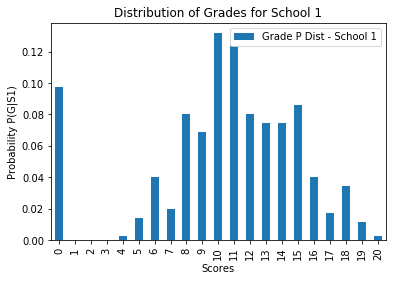

In [108]:
plt.figure(figsize=(12,9))
p_grade_given_s1.plot.bar()
plt.xlabel("Scores")
plt.ylabel("Probability P(G|S1)")
plt.title("Distribution of Grades for School 1")
plt.show()

In [64]:
temp = pd.DataFrame(data_scores[data_scores["school"] == "MS"]["G3"].value_counts()).sort_index()
p_grade_given_s2 = pd.DataFrame(index=range(21))
p_grade_given_s2["Grade P Dist - School 2"] = temp / temp.sum()
p_grade_given_s2 = p_grade_given_s2.fillna(0)

p_grade_given_s2.head()

,Grade P Dist - School 2
0,0.086957
1,0.000000
2,0.000000
3,0.000000
4,0.000000


<Figure size 864x648 with 0 Axes>

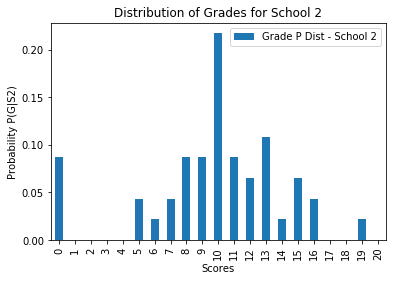

In [106]:
plt.figure(figsize=(12,9))
p_grade_given_s2.plot.bar()
plt.xlabel("Scores")
plt.ylabel("Probability P(G|S2)")
plt.title("Distribution of Grades for School 2")
plt.show()

#### 2. Calculate the Probability of Each School

This corresponds to the probability that a student attends one of the two schools.

In [44]:
temp = pd.DataFrame(data_scores["school"].value_counts())
p_s = temp / temp.sum()
p_s.columns = ["Probability"]
p_s.index=["School 1", "School 2"]
p_s

,Probability
School 1,0.883544
School 2,0.116456


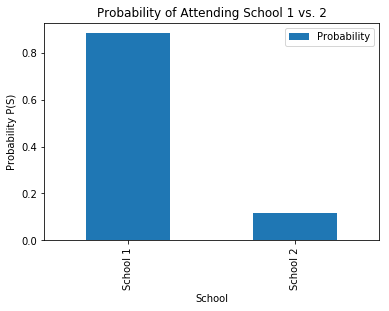

In [104]:
p_s.plot.bar()
plt.xlabel("School")
plt.ylabel("Probability P(S)")
plt.title("Probability of Attending School 1 vs. 2")
plt.show()

#### 3. Calculate the Probability Distribution of Grades for Both Schools

This corresponds to the probability of a student from either of the schools earning a certain grade:

\begin{equation*}
P(G) = P(G, S1) + P(G, S2) = P(G | S1)P(S1) + P(G | S2)P(S2)
\end{equation*}

In [97]:
p_grade_and_school1 = p_grade_given_s1 * p_s.loc["School 1","Probability"]
p_grade_and_school2 = p_grade_given_s2 * p_s.loc["School 2","Probability"]
p_grade_and_school = pd.DataFrame()
p_grade_and_school["P(G,S1)"] = p_grade_and_school1["Grade P Dist - School 1"]
p_grade_and_school["P(G,S2)"] = p_grade_and_school2["Grade P Dist - School 2"]
p_grade_and_school.head()

,"P(G,S1)","P(G,S2)"
0,0.086076,0.010127
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.002532,0.000000


In [101]:
p_grade = p_grade_and_school.sum(axis=1).to_frame().rename(columns={0: "P(G)"})
p_grade.head()

,P(G)
0,0.096203
1,0.000000
2,0.000000
3,0.000000
4,0.002532


<Figure size 864x648 with 0 Axes>

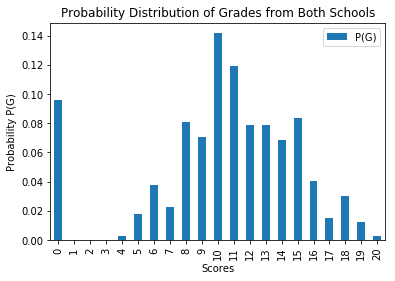

In [105]:
plt.figure(figsize=(12,9))
p_grade.plot.bar()
plt.xlabel("Scores")
plt.ylabel("Probability P(G)")
plt.title("Probability Distribution of Grades from Both Schools")
plt.show()

#### 4. Calculate the Expected Grades for Each School and Overall Expected Grade

This corresponds to the expected grade that a student earns.

\begin{equation*}
E[G|S] = \sum_{g=0}^{20}gP(g|S) \\
\\
E[G] = \sum_{g=0}^{20}gP(g)
\end{equation*}

In [114]:
e_grade_given_school1 = np.sum([index * value for index, value in zip(p_grade_given_s1.index, p_grade_given_s1.values)])

print("Expected grade given school 1: {:0.2f}".format(e_grade_given_school1))

Expected grade given school 1: 10.49


In [115]:
e_grade_given_school2 = np.sum([index * value for index, value in zip(p_grade_given_s2.index, p_grade_given_s2.values)])

print("Expected grade given school 2: {:0.2f}".format(e_grade_given_school2))

Expected grade given school 2: 9.85


In [116]:
e_grade = np.sum([index * value for index, value in zip(p_grade.index, p_grade.values)])

print("Expected overall grade: {:0.2f}".format(e_grade))

Expected overall grade: 10.42
